In [1]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "/home/xc425/project/models"

In [2]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

73
73


run_id               task  \
30  17d87355-0a38-4598-9e60-4a0f1784c2d1  linear_regression   
57  2288c009-7841-4e31-8a05-aa0c5aa41e63  linear_regression   
31  b800455a-3f39-4a53-84d4-f7a3c1b70ea9  linear_regression   
50  6ee16627-0be9-4f9d-b88b-86ce5cc488bc  linear_regression   
4   a832c81f-c7b6-48dd-9a17-99f4d3895f1b  linear_regression   
..                                   ...                ...   
33  faf2afcc-e2ce-4b20-bee1-13cb3e4cb79e  linear_regression   
58  cf8f1741-754c-48d3-9786-27d1f00bab84  linear_regression   
64  26709fa3-bb49-4a81-bdca-0fb1af4a9e3b  linear_regression   
63  febcf86a-29a0-4f01-8277-bd94f3c42813  linear_regression   
55  2426cdcb-cbe4-45e2-addb-a83ada3cff62  linear_regression   

                model kwargs  num_tasks  num_examples  n_dims  n_layer  \
30  Transformer-small                -1            -1      20        6   
57  Transformer-small                -1            -1      20        6   
31  Transformer-small                -1            -1      20        6   
50  Transformer-small                -1            -1      10        6   
4   Transformer-small                -1            -1       1        6   
..                ...    ...        ...           ...     ...      ...   
33     Transformer-xs                -1            -1      50        3   
58     Transformer-xs                -1            -1       2        3   
64     Transformer-xs                -1            -1       5        3   
63     Transformer-xs                -1            -1       5        3   
55     Transformer-xs                -1            -1       5        3   

    n_head                                run_name  
30       4                 linear_regression_small  
57       4           linear_regression_small_100ex  
31       4          linear_regression_small_100ex2  
50       4        linear_regression_small_10d_ex40  
4        4         linear_regression_small_1d_ex40  
..     ...                                     ...  
33       2             linear_regression_tiny_50d2  
58       2         linear_regression_tiny_50d_ex40  
64       2          linear_regression_tiny_5d_ex40  
63       2  linear_regression_tiny_5d_ex40_t500_10  
55       2  linear_regression_tiny_5d_ex40_t500_11  

[73 rows x 10 columns]

In [11]:
task = "linear_regression"
#task = "sparse_linear_regression"
#task = "decision_tree"
#task = "relu_2nn_regression"

run_id = "febcf86a-29a0-4f01-8277-bd94f3c42813"  # if you train more models, replace with the run_id from the table above

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = False

if recompute_metrics:
    get_run_metrics(run_path)  # these are normally precomputed at the end of training

# Plot pre-computed metrics

linear_regression_tiny_5d_ex40_t500_10 febcf86a-29a0-4f01-8277-bd94f3c42813
5
{'standard': {'task_name': 'linear_regression', 'n_dims': 5, 'n_points': 500, 'batch_size': 64, 'data_name': 'gaussian', 'prompting_strategy': 'standard'}, 'random_quadrants': {'task_name': 'linear_regression', 'n_dims': 5, 'n_points': 500, 'batch_size': 64, 'data_name': 'gaussian', 'prompting_strategy': 'random_quadrants'}, 'orthogonal_train_test': {'task_name': 'linear_regression', 'n_dims': 5, 'n_points': 500, 'batch_size': 64, 'data_name': 'gaussian', 'prompting_strategy': 'orthogonal_train_test'}, 'overlapping_train_test': {'task_name': 'linear_regression', 'n_dims': 5, 'n_points': 500, 'batch_size': 64, 'data_name': 'gaussian', 'prompting_strategy': 'overlapping_train_test'}, 'half_subspace': {'task_name': 'linear_regression', 'n_dims': 5, 'n_points': 500, 'batch_size': 64, 'data_name': 'gaussian', 'prompting_strategy': 'standard', 'data_sampler_kwargs': {'scale': tensor([[ 1.3742,  0.5289,  0.0225,  0.

100%|██████████| 15/15 [00:00<00:00, 147686.76it/s]


{'half_subspace': {'Transformer-xs': {'mean': [1.055528450012207, 0.45754060745239256, 0.15296738147735595, 0.04210318624973297, 0.018637578189373016, 0.01746879518032074, 0.01742936223745346, 0.02502574324607849, 0.02354952394962311, 0.02397948205471039, 0.03304800987243652, 0.03243951797485352, 0.025954753160476685, 0.04055609703063965, 0.05387886762619019, 0.032646244764328, 0.030226653814315795, 0.035675731301307675, 0.035816118121147156, 0.04315944314002991, 0.0442732036113739, 0.03963956832885742, 0.03472211956977844, 0.03765552639961243, 0.03770861327648163, 0.037968811392784116, 0.04024364948272705, 0.042278322577476504, 0.03701469004154205, 0.040213146805763246, 0.033839407563209536, 0.03166993260383606, 0.04048591554164886, 0.04597565233707428, 0.0346618115901947, 0.03966901302337646, 0.03527355194091797, 0.03636012077331543, 0.042247277498245236, 0.040638571977615355, 1.5953282356262206, 1.6250457763671875, 1.5902299880981445, 1.7473628997802735, 1.288057518005371, 1.2480018

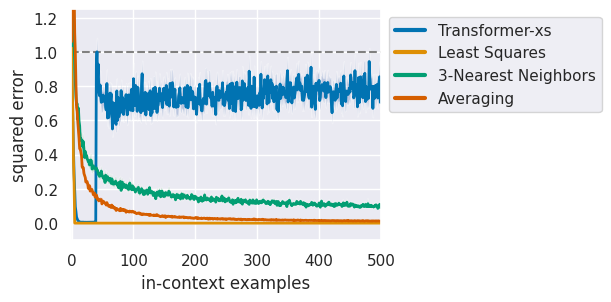

In [12]:
def valid_row(r):
    return r.task == task and r.run_id == run_id

metrics = collect_results(run_dir, df, valid_row=valid_row)
print(metrics)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims

models = relevant_model_names[task]
basic_plot(metrics["standard"], models=models)
plt.show()

['Transformer-xs', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-xs': {'mean': [1.055528450012207, 0.45754060745239256, 0.15296738147735595, 0.04210318624973297, 0.018637578189373016, 0.01746879518032074, 0.01742936223745346, 0.02502574324607849, 0.02354952394962311, 0.02397948205471039, 0.03304800987243652, 0.03243951797485352, 0.025954753160476685, 0.04055609703063965, 0.05387886762619019, 0.032646244764328, 0.030226653814315795, 0.035675731301307675, 0.035816118121147156, 0.04315944314002991, 0.0442732036113739, 0.03963956832885742, 0.03472211956977844, 0.03765552639961243, 0.03770861327648163, 0.037968811392784116, 0.04024364948272705, 0.042278322577476504, 0.03701469004154205, 0.040213146805763246, 0.033839407563209536, 0.03166993260383606, 0.04048591554164886, 0.04597565233707428, 0.0346618115901947, 0.03966901302337646, 0.03527355194091797, 0.03636012077331543, 0.042247277498245236, 0.040638571977615355, 1.5953282356262206, 1.6250457763671875, 1.590229988098

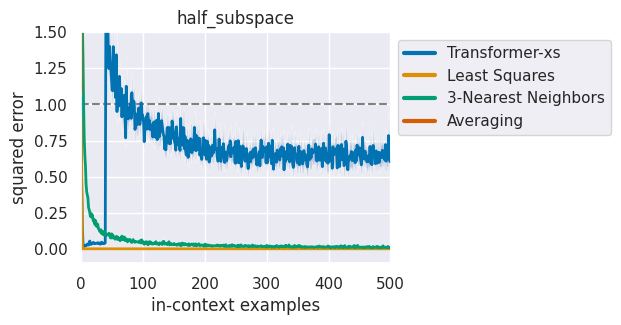

['Transformer-xs', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-xs': {'mean': [0.9462710380554199, 0.8883217811584473, 0.7961100101470947, 0.7523176670074463, 0.69712233543396, 0.6417408943176269, 0.6020668983459473, 0.5086415767669678, 0.453094482421875, 0.401582145690918, 0.3818764925003052, 0.3675527572631836, 0.3469191312789917, 0.2920356750488281, 0.2580249309539795, 0.2968443870544434, 0.2846837520599365, 0.290065598487854, 0.2696622371673584, 0.2745328426361084, 0.2678302526473999, 0.2827459812164307, 0.2752636432647705, 0.2668727397918701, 0.30260376930236815, 0.2827911853790283, 0.27344632148742676, 0.2591922044754028, 0.2939481735229492, 0.2841844081878662, 0.2738655090332031, 0.2708591938018799, 0.27242815494537354, 0.28186204433441164, 0.276762056350708, 0.28215622901916504, 0.27126269340515136, 0.2857027053833008, 0.25561046600341797, 0.2859226703643799, 1.2001527786254882, 1.1444351196289062, 1.1429585456848144, 1.1069738388061523, 0.9854697227478028

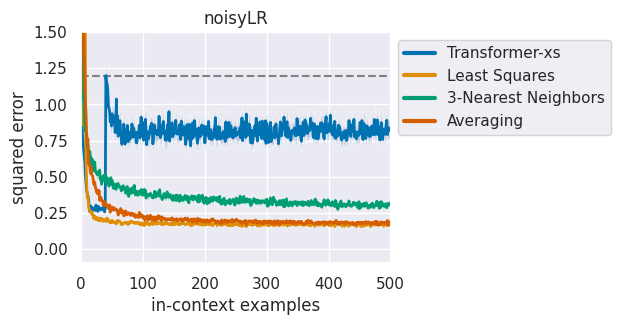

['Transformer-xs', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-xs': {'mean': [1.061222743988037, 0.9036842346191406, 1.0097206115722657, 1.120864200592041, 1.0252711296081543, 0.003935555368661881, 0.0023718874901533125, 0.0014862540178000928, 0.001245325431227684, 0.0009275056421756744, 0.0007111350540071725, 0.000562497926875949, 0.0005142043344676494, 0.000499790208414197, 0.00044078780338168143, 0.000673153018578887, 0.0007264677435159684, 0.0006860536523163319, 0.0007110902573913336, 0.0006910855416208505, 0.0006923141423612833, 0.0007122231181710958, 0.0007405114360153675, 0.0006999424193054437, 0.0007295201066881418, 0.0006926351692527532, 0.0007070822175592184, 0.0007198440376669169, 0.0007175142876803875, 0.0006837801076471806, 0.0007145340088754893, 0.0006925384514033794, 0.0007047297898679971, 0.0007163530681282282, 0.0007157403975725174, 0.0007412201259285212, 0.0007285592611879111, 0.0007430572062730789, 0.0007185345049947501, 0.0007060269825160503, 

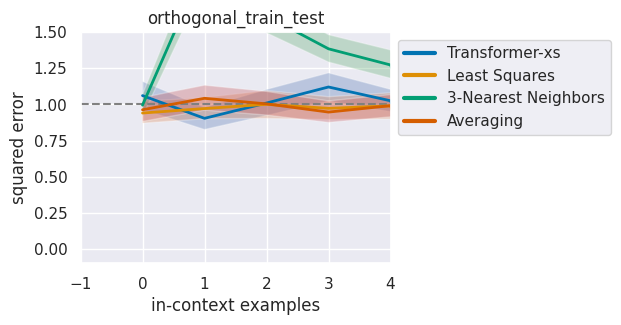

['Transformer-xs', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-xs': {'mean': [1.1648545265197754, 0.011446758359670638, 0.012891453504562379, 0.010768894106149673, 0.011797304451465606, 0.010979322344064712, 0.010430763661861419, 0.008871155977249145, 0.008034522831439971, 0.006518656015396118, 0.0056635111570358275, 0.004430801421403885, 0.004141554981470108, 0.0035790201276540757, 0.0033576060086488724, 0.0032239943742752076, 0.0031701266765594483, 0.003821805492043495, 0.0033692017197608946, 0.00335138775408268, 0.0037101700901985167, 0.0038283515721559526, 0.0035715077072381975, 0.003550929203629494, 0.0038571763783693314, 0.0039986085146665575, 0.004105137661099434, 0.003920508176088333, 0.004068650677800179, 0.003663709759712219, 0.004190482944250107, 0.004310305789113044, 0.0041861914098262785, 0.004199836403131485, 0.004181034862995148, 0.004531804472208023, 0.003969790413975716, 0.004600021988153458, 0.003892229124903679, 0.00533362440764904, 0.958912467

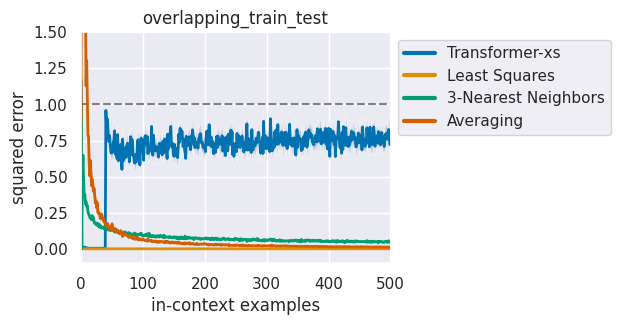

['Transformer-xs', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-xs': {'mean': [1.103972816467285, 0.768369197845459, 0.6553176879882813, 0.5212374210357666, 0.37395966053009033, 0.28983495235443113, 0.25325846672058105, 0.26512923240661623, 0.22253341674804689, 0.20991120338439942, 0.20236542224884033, 0.1902490258216858, 0.16886981725692748, 0.18886184692382812, 0.17490978240966798, 0.13102478981018068, 0.13324928283691406, 0.1517695188522339, 0.13433188199996948, 0.1375110149383545, 0.1405383586883545, 0.1484711766242981, 0.1509793519973755, 0.14866561889648439, 0.15084993839263916, 0.16684563159942628, 0.15552685260772706, 0.16302223205566407, 0.18236143589019777, 0.1796884298324585, 0.1834811568260193, 0.17821762561798096, 0.16218302249908448, 0.17894356250762938, 0.1799978256225586, 0.18740661144256593, 0.19897388219833373, 0.2051016092300415, 0.20139238834381104, 0.20181219577789306, 2.7423528671264648, 2.735922622680664, 2.425665855407715, 2.484973526000976

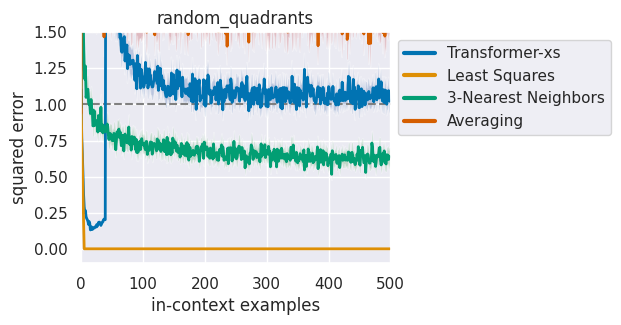

['Transformer-xs', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-xs': {'mean': [0.11812015771865844, 0.0947899043560028, 0.0759062111377716, 0.05244018435478211, 0.03829930424690246, 0.030327311158180235, 0.021883051097393035, 0.018823954463005065, 0.012910102307796479, 0.012232697010040284, 0.010112448036670685, 0.009301578998565674, 0.007200830429792404, 0.006558178365230561, 0.006694532930850983, 0.0060423601418733595, 0.006496752053499222, 0.00625578984618187, 0.0060125719755887985, 0.005683554336428642, 0.006079765036702156, 0.005777700617909431, 0.006327901780605316, 0.00573149099946022, 0.006157662719488144, 0.005850771814584732, 0.006564656645059586, 0.006397845596075058, 0.006026262789964676, 0.00577411949634552, 0.006293070316314697, 0.005887793749570847, 0.006189082935452461, 0.006490042805671692, 0.00674780011177063, 0.006481660902500153, 0.005976485460996628, 0.006273841857910157, 0.006800328195095062, 0.005914776772260666, 0.5892668724060058, 0.642513

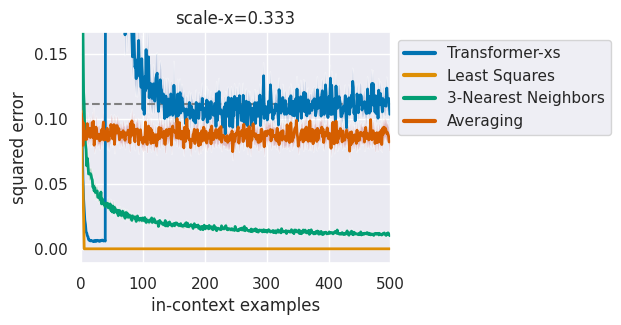

['Transformer-xs', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-xs': {'mean': [0.25258946418762207, 0.19812180995941162, 0.16004148721694947, 0.10164005756378174, 0.07566328048706054, 0.05057185888290405, 0.03463303744792938, 0.02480810135602951, 0.018291002511978148, 0.012102438509464264, 0.0089339017868042, 0.00816996619105339, 0.007898421585559845, 0.00592457465827465, 0.00519782081246376, 0.004486116021871567, 0.004556787386536598, 0.004833594337105751, 0.004681747779250145, 0.005112215131521225, 0.004908055439591408, 0.004581981524825096, 0.005136001855134964, 0.004578012228012085, 0.005015188455581665, 0.004790245369076729, 0.004391397535800934, 0.00543539747595787, 0.004622066020965576, 0.004417777806520462, 0.004394979029893875, 0.0050719350576400755, 0.004871890693902969, 0.004618116095662117, 0.00515287034213543, 0.004958073049783707, 0.004845142737030983, 0.005096406862139702, 0.004668232798576355, 0.005136310309171677, 0.6963493347167968, 0.66962709426

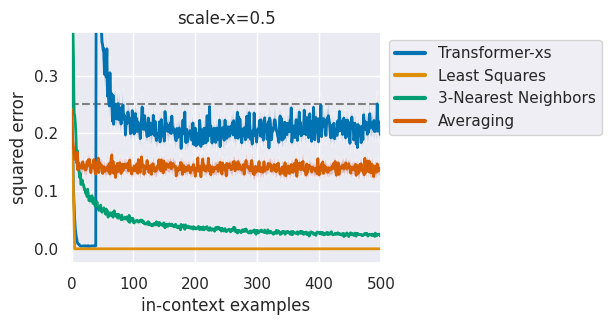

['Transformer-xs', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-xs': {'mean': [3.443604278564453, 3.3684032440185545, 2.2321239471435548, 1.8948656082153321, 1.4008432388305665, 0.8493565559387207, 0.5902755737304688, 0.47325644493103025, 0.35841851234436034, 0.31952838897705077, 0.2172027349472046, 0.24634745121002197, 0.17957608699798583, 0.16242589950561523, 0.12873489856719972, 0.15593335628509522, 0.17295334339141846, 0.10815107822418213, 0.16372461318969728, 0.15342986583709717, 0.1250429630279541, 0.13235020637512207, 0.11592884063720703, 0.1780108094215393, 0.13083423376083375, 0.1440832495689392, 0.11136528253555297, 0.1392962098121643, 0.15520389080047609, 0.13372514247894288, 0.1287787675857544, 0.15146052837371826, 0.11289446353912354, 0.12229247093200683, 0.15060825347900392, 0.12992117404937745, 0.1501682162284851, 0.155586838722229, 0.12010869979858399, 0.14781152009963988, 2.508278465270996, 2.467851257324219, 2.508230972290039, 3.082001304626465, 

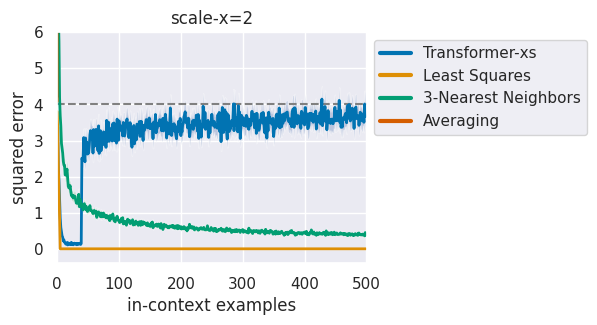

['Transformer-xs', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-xs': {'mean': [9.021554565429687, 7.702242279052735, 6.468270874023437, 5.677787017822266, 4.982163619995117, 3.776670455932617, 3.730438995361328, 3.1243066787719727, 2.8159069061279296, 2.758083534240723, 2.6826313018798826, 2.73171443939209, 2.7193630218505858, 2.1762447357177734, 2.4146392822265623, 2.0904766082763673, 2.1447769165039063, 2.542043685913086, 2.1815008163452148, 2.4005239486694334, 2.133665657043457, 2.401041793823242, 2.3677940368652344, 2.393973731994629, 2.2865779876708983, 2.4153717041015623, 2.4576831817626954, 2.282195472717285, 2.3928077697753904, 2.2450450897216796, 2.117101287841797, 2.7650293350219726, 1.9497434616088867, 2.1325130462646484, 2.9393245697021486, 2.727882957458496, 2.5865972518920897, 2.5043666839599608, 2.4826019287109373, 2.3222604751586915, 7.211750793457031, 7.0974891662597654, 7.394654083251953, 7.995680236816407, 7.114068603515625, 7.257595062255859, 6

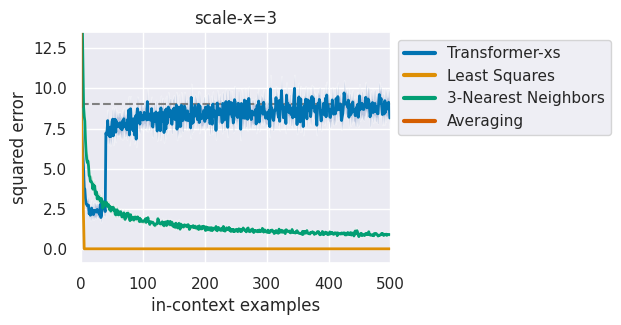

['Transformer-xs', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-xs': {'mean': [0.11347618103027343, 0.09061220288276672, 0.06742079854011536, 0.04884673058986664, 0.034694939851760864, 0.02209387570619583, 0.014738264679908752, 0.009389759600162506, 0.005967722088098526, 0.00355973020195961, 0.0026412200182676314, 0.001968102529644966, 0.0015204650349915027, 0.0014003765769302844, 0.0009768431074917317, 0.0009302658960223198, 0.0009264698252081871, 0.0009685422293841839, 0.0009029910899698735, 0.0008641384541988373, 0.0008369023911654949, 0.0010782768949866295, 0.0008594980463385582, 0.0008692465722560883, 0.0010893864557147026, 0.0008498242124915123, 0.000866521243005991, 0.0008199816569685936, 0.0009375838562846184, 0.0008155075833201408, 0.0008493946865200996, 0.0008362654596567153, 0.0009012649767100811, 0.000809002760797739, 0.0008556738495826722, 0.0008377658203244209, 0.0010037992149591445, 0.0008640808984637261, 0.0009095390327274799, 0.0009765910916030407

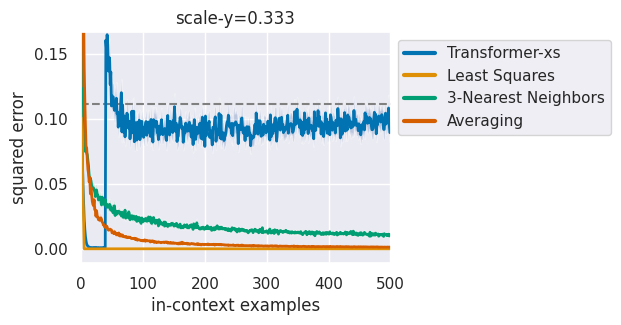

['Transformer-xs', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-xs': {'mean': [0.2656135320663452, 0.1962125539779663, 0.14989993572235108, 0.10896955728530884, 0.07095199823379517, 0.0424837589263916, 0.02844054400920868, 0.014773307740688324, 0.01176498681306839, 0.006368812173604965, 0.0047517441213130954, 0.003747779130935669, 0.0027219969779253006, 0.0024322068318724634, 0.001874970644712448, 0.0016079181805253029, 0.0014532807283103466, 0.0016614634543657303, 0.0014365446753799916, 0.0016139958053827286, 0.0017831826582551003, 0.0014454508200287819, 0.0016473125666379928, 0.001505276281386614, 0.0014032003469765185, 0.0016152676194906234, 0.0016168709844350815, 0.0015355691313743592, 0.0015901241451501847, 0.0014443355612456799, 0.001605721190571785, 0.001447634119540453, 0.0016885355114936828, 0.0015482142567634582, 0.001466206181794405, 0.0017384346574544907, 0.0016811300069093705, 0.0018052233383059502, 0.0013927100226283073, 0.0015748590230941772, 0.3059

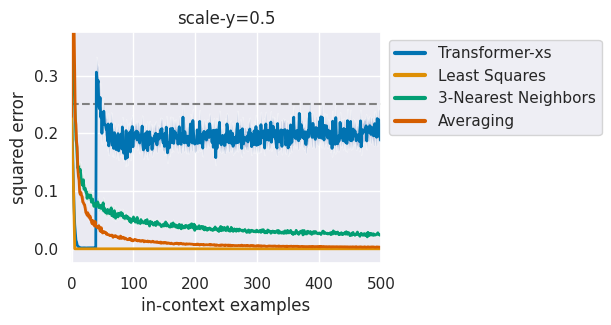

['Transformer-xs', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-xs': {'mean': [4.259255981445312, 3.3124835968017576, 2.43874568939209, 1.8278759002685547, 1.1534455299377442, 0.7552130699157715, 0.6083263397216797, 0.4010631084442139, 0.295505166053772, 0.28142733573913575, 0.15967371463775634, 0.13285329341888427, 0.09347465634346008, 0.08451809883117675, 0.07788705825805664, 0.07725880742073059, 0.09449654817581177, 0.08795188665390015, 0.0851099967956543, 0.09100861549377441, 0.08357704281806946, 0.08949489593505859, 0.10038472414016723, 0.08171855807304382, 0.07125762701034546, 0.06975780725479126, 0.09410756826400757, 0.08475505709648132, 0.06788074374198913, 0.07093607187271118, 0.0804541289806366, 0.0714239776134491, 0.08624563217163086, 0.07326887845993042, 0.0827325165271759, 0.08037001490592957, 0.0903365135192871, 0.06302815079689025, 0.07608454823493957, 0.08592950701713561, 2.7875295639038087, 2.7302684783935547, 2.606821632385254, 3.2302783966064452

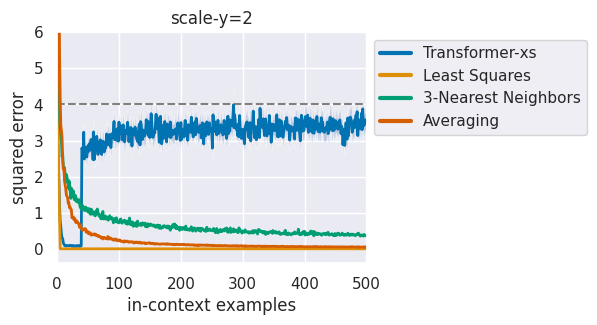

['Transformer-xs', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-xs': {'mean': [8.296434783935547, 6.411784362792969, 5.428952026367187, 4.264081573486328, 3.1930349349975584, 2.307942771911621, 1.9019035339355468, 1.5250615119934081, 1.1101964950561523, 1.026408863067627, 1.0075069427490235, 0.7488983154296875, 0.8930235862731933, 0.7165510654449463, 0.6150813102722168, 0.6438160896301269, 0.8122468948364258, 0.5579802989959717, 0.692446517944336, 0.9229105949401856, 0.7219877719879151, 0.7596815586090088, 0.636110782623291, 0.8009443283081055, 0.6345576286315918, 0.7877390384674072, 0.6469097137451172, 0.716036319732666, 0.6092977046966552, 0.613594913482666, 0.5272349357604981, 0.552204942703247, 0.5749033927917481, 0.5319612979888916, 0.5686570644378662, 0.633966588973999, 0.5256492614746093, 0.6834406852722168, 0.5623741626739502, 0.6353271484375, 5.800913619995117, 5.61303596496582, 6.428947448730469, 6.2669422149658205, 5.831245040893554, 5.786420822143555, 

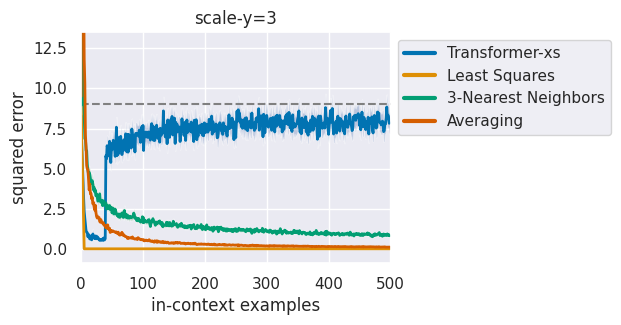

['Transformer-xs', 'Least Squares', '3-Nearest Neighbors', 'Averaging']
{'Transformer-xs': {'mean': [0.9727033615112305, 0.62691650390625, 0.3625420808792114, 0.22352263927459717, 0.15165581703186035, 0.09913073778152466, 0.07133862376213074, 0.06799044609069824, 0.05528694987297058, 0.061317598819732665, 0.04376436769962311, 0.05598204135894776, 0.04547831118106842, 0.05019487738609314, 0.05523502230644226, 0.051026773452758786, 0.05435923337936401, 0.04241734445095062, 0.049320220947265625, 0.04769271314144134, 0.04852672517299652, 0.046129798889160155, 0.05098090767860412, 0.047863554954528806, 0.045856046676635745, 0.04618894457817078, 0.05310126543045044, 0.055695521831512454, 0.05720134973526001, 0.045541828870773314, 0.05432347059249878, 0.04400156140327453, 0.04713903367519379, 0.05225908160209656, 0.04848394393920898, 0.04754761755466461, 0.05046769380569458, 0.04675149023532867, 0.05323750376701355, 0.062085163593292234, 1.247835350036621, 1.2591985702514648, 1.23952646255493

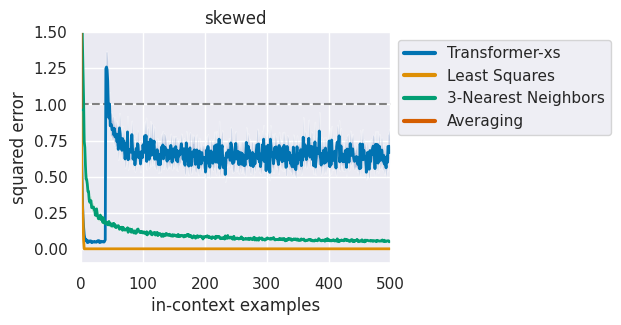

In [13]:
# plot any OOD metrics
for name, metric in metrics.items():
    if name == "standard": continue
   
    if "scale" in name:
        scale = float(name.split("=")[-1])**2
    else:
        scale = 1.0

    trivial = 1.0 if "noisy" not in name else (1+1/n_dims)
    fig, ax = basic_plot(metric, models=models, trivial=trivial * scale)
    ax.set_title(name)
    
    if "ortho" in name:
        ax.set_xlim(-1, n_dims - 1)
    ax.set_ylim(-.1 * scale, 1.5 * scale)

    plt.show()

# Interactive setup

We will now directly load the model and measure its in-context learning ability on a batch of random inputs. (In the paper we average over multiple such batches to obtain better estimates.)

In [6]:
from samplers import get_data_sampler
from tasks import get_task_sampler

In [7]:
model, conf = get_model_from_run(run_path)

n_dims = conf.model.n_dims
batch_size = conf.training.batch_size

data_sampler = get_data_sampler(conf.training.data, n_dims)
task_sampler = get_task_sampler(
    conf.training.task,
    n_dims,
    batch_size,
    **conf.training.task_kwargs
)

In [8]:
task = task_sampler()
xs = data_sampler.sample_xs(b_size=batch_size, n_points=conf.training.curriculum.points.end)
ys = task.evaluate(xs)

In [9]:
with torch.no_grad():
    pred = model(xs, ys)

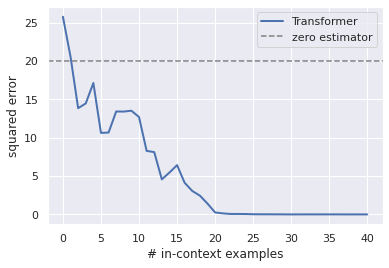

In [10]:
metric = task.get_metric()
loss = metric(pred, ys).numpy()

sparsity = conf.training.task_kwargs.sparsity if "sparsity" in conf.training.task_kwargs else None
baseline = {
    "linear_regression": n_dims,
    "sparse_linear_regression": sparsity,
    "relu_2nn_regression": n_dims,
    "decision_tree": 1,
}[conf.training.task]

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

As an exploration example, let's see how robust the model is to doubling all the inputs.

In [11]:
xs2 = 2 * xs
ys2 = task.evaluate(xs2)
with torch.no_grad():
    pred2 = model(xs2, ys2)

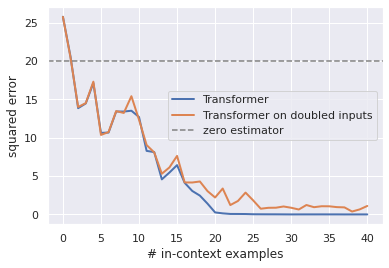

In [12]:
loss2 = metric(pred2, ys2).numpy()

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.plot(loss2.mean(axis=0) / 4, lw=2, label="Transformer on doubled inputs")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

The error does increase, especially when the number of in-context examples exceeds the dimension, but the model is still relatively accurate.